epoch=  1,train_loss=655.6894,valid_loss=501.1027
epoch=  2,train_loss=525.0674,valid_loss=379.4087
epoch=  3,train_loss=424.4223,valid_loss=290.1638
epoch=  4,train_loss=346.8518,valid_loss=225.3109
epoch=  5,train_loss=287.0450,valid_loss=178.7253
epoch=  6,train_loss=240.9154,valid_loss=145.7592
epoch=  7,train_loss=205.3183,valid_loss=122.8931
epoch=  8,train_loss=177.8335,valid_loss=107.4676
epoch=  9,train_loss=156.5984,valid_loss=97.4796
epoch= 10,train_loss=140.1791,valid_loss=91.4247
epoch= 11,train_loss=127.4720,valid_loss=88.1777
epoch= 12,train_loss=117.6271,valid_loss=86.9011
epoch= 13,train_loss=109.9903,valid_loss=86.9751
epoch= 14,train_loss=104.0574,valid_loss=87.9441
epoch= 15,train_loss=99.4402,valid_loss=89.4760
epoch= 16,train_loss=95.8398,valid_loss=91.3318
epoch= 17,train_loss=93.0254,valid_loss=93.3417
epoch= 18,train_loss=90.8194,valid_loss=95.3871
epoch= 19,train_loss=89.0849,valid_loss=97.3879
epoch= 20,train_loss=87.7159,valid_loss=99.2916
epoch= 21,train_lo

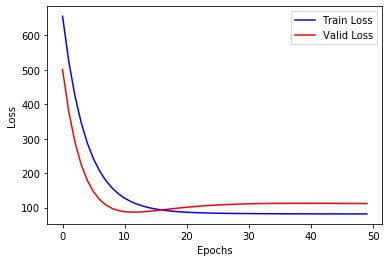

In [3]:
import tensorflow as tf;        #导入TensorFlow
import numpy as np;        #导入numpy 
import matplotlib.pyplot as plt;        #导入matplotlib

#在Jupyter中，使用matplot1ib显 示图像需要设置为inline模式，否则不会在网页里显示图像
%matplotlib inline

import pandas as pd;        #导入pandas
from sklearn.utils import shuffle;        #导入sklearn的shuffle
from sklearn.preprocessing import scale;        #导入sk1earn的scale

#print("TensorFlow版本是:",tf.__version__);        #显示当前TensorFlow版本

df = pd.read_csv("D:\\data\\boston.csv", header=0);
#print(df.describe());

#获取数据集的值
ds = df.values;	# df.values以np.array形式返回数据集的值
# print(ds.shape);	#查看数据的形状
# print(ds);		#查看数据集的值

# x data为归一化后的前12列特征数据
x_data = ds[:,:12];
# y_ data为最后1列标签数据
y_data = ds[:,12];
#对特征数据[0到11]列 做(0-1)归一化
for i in range(12):
    x_data[:,i]=(x_data[:,i]-x_data[:,i].min())/(x_data[:,i].max()-x_data[:,i].min());
# print('x_data shape=',x_data.shape);
# print('y_data shape=',y_data.shape);

train_num = 300;	#训练集的数目
valid_num = 100;	#验证集的数目
test_num = len(x_data) - train_num - valid_num;	#测试集的数目= 506 -训练集的数目-验证集的数目

#训练集划分
x_train = x_data[:train_num];
y_train = y_data[:train_num];

#验证集划分
x_valid = x_data[train_num:train_num+valid_num];
y_valid = y_data[train_num:train_num+valid_num];

#测试集划分
x_test = x_data[train_num+valid_num:train_num+valid_num+test_num];
y_test = y_data[train_num+valid_num:train_num+valid_num+test_num];

#转换为f.float32数据类型，后面求损失时要和变量W执行tf.matmul操作
x_train = tf. cast(x_train, dtype=tf.float32);
x_valid = tf. cast(x_valid, dtype=tf.float32);
x_test = tf. cast(x_test, dtype=tf.float32);

def model(x,w,b):
    return tf.matmul(x,w) + b;

W = tf.Variable(tf.random.normal([12,1],mean=0.0,stddev=1.0,dtype=tf.float32));
B = tf.Variable(tf.zeros(1),dtype=tf.float32);
# print(W);
# print(B);

training_epochs = 50; 	#迭代次数
learning_rate = 0.001; 	#学习率
batch_size = 11;	#批量训练一次的样本数（超参数）

#采用均方差作为损失函数
def loss (x,y,w,b):
    err = model(x, w, b)-y; 	#计算模型预测值和标签值的差异
    squared_err = tf. square(err);        #求平方，得出方差
    return tf.reduce_mean(squared_err);        #求均值，得出均方差. 

#计算样本数据[x, y]在参数[w, b]点上的梯度
def grad(x, y, w, b) :
    with tf.GradientTape() as tape :
        loss_ = loss(x,y,w,b);
    return tape.gradient(loss_,[w,b]);	#返回梯度向量

optimizer = tf.keras.optimizers.SGD(learning_rate); 	#创建优化器，指定学习率

loss_list_train = []; 	#用于保存训练集loss值的列表
loss_list_valid = [];	 #用于保存验证集loss值的列表
total_step = int(train_num/batch_size);
for epoch in range (training_epochs) :
    for step in range(total_step) :
        xs = x_train[step*batch_size:(step+1)*batch_size,:];
        ys = y_train[step*batch_size:(step+1)*batch_size];

        grads = grad(xs, ys, W, B);	#计算梯度
        optimizer.apply_gradients(zip(grads, [W, B]));	 #优化器根据梯度自动调整变量w和b

    loss_train = loss(x_train, y_train,W,B).numpy();	#计算当前轮训练损失
    loss_valid = loss(x_valid, y_valid,W,B).numpy();	#计算当前轮验证损失
    loss_list_train.append(loss_train);
    loss_list_valid.append(loss_valid);
    print("epoch={:3d},train_loss={:.4f},valid_loss={:.4f}".format(epoch+1,loss_train,loss_valid));

plt.xlabel("Epochs");
plt.ylabel("Loss");
plt.plot(loss_list_train,'blue',label="Train Loss");
plt.plot(loss_list_valid,'red',label="Valid Loss");
plt.legend(loc=1);	#通过参数1oc指定图例位置

print("Test_loss：{:.4f}".format(loss(x_test,y_test,W,B).numpy()));
